<a href="https://colab.research.google.com/github/thelittleyellow/Nanasphi/blob/main/Tugas_Mesin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv("/content/train.csv")
m, n = data.shape
data = np.array(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

print("Data loaded!")
print("Train:", X_train.shape, Y_train.shape)
print("Dev  :", X_dev.shape, Y_dev.shape)

Data loaded!
Train: (784, 41000) (41000,)
Dev  : (784, 1000) (1000,)


In [ ]:
def initialize_parameters():
    W1 = np.random.randn(64, 784) * 0.01
    b1 = np.zeros((64, 1))
    W2 = np.random.randn(10, 64) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def relu(Z): return np.maximum(0, Z)

def softmax(Z):
    shiftZ = Z - np.max(Z, axis=0, keepdims=True)
    expZ = np.exp(shiftZ)
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    Y = Y.astype(int).flatten()
    one_hot_Y = np.zeros((Y.max() + 1, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def dReLU(Z): return Z > 0

def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * dReLU(Z1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2


In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initialize_parameters()
    for i in range(int(iterations)):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0 or i == iterations -1:
            print("Iteration:", i)
            predictions = get_predictions(A2)
            print("Accuracy:", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.001, iterations=500)
print("Dev accuracy:", get_accuracy(make_predictions(X_dev, W1, b1, W2, b2), Y_dev))

Iteration: 0
Accuracy: 0.09207317073170732
Iteration: 10
Accuracy: 0.6637560975609756
Iteration: 20
Accuracy: 0.7780487804878049
Iteration: 30
Accuracy: 0.8196097560975609
Iteration: 40
Accuracy: 0.8422439024390244
Iteration: 50
Accuracy: 0.8564146341463414
Iteration: 60
Accuracy: 0.8668780487804878
Iteration: 70
Accuracy: 0.8751951219512195
Iteration: 80
Accuracy: 0.8806341463414634
Iteration: 90
Accuracy: 0.8850731707317073
Iteration: 100
Accuracy: 0.889219512195122
Iteration: 110
Accuracy: 0.8926341463414634
Iteration: 120
Accuracy: 0.8954146341463415
Iteration: 130
Accuracy: 0.8981219512195122
Iteration: 140
Accuracy: 0.9010731707317073
Iteration: 150
Accuracy: 0.9030243902439025
Iteration: 160
Accuracy: 0.9050975609756098
Iteration: 170
Accuracy: 0.9067804878048781
Iteration: 180
Accuracy: 0.9087804878048781
Iteration: 190
Accuracy: 0.9104634146341464
Iteration: 200
Accuracy: 0.9119268292682927
Iteration: 210
Accuracy: 0.9134146341463415
Iteration: 220
Accuracy: 0.9142926829268293

NameError: name 'make_predictions' is not defined

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, X, Y, W1, b1, W2, b2):
    current_image = X[:, index, None]
    prediction = make_predictions(X[:, index, None], W1, b1, W2, b2)
    label = Y.flatten()[index]
    print("Prediction:", int(prediction))
    print("Label     :", label)

    img = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(img, interpolation="nearest")
    plt.show()



Prediction: 0
Label     : 0


/tmp/ipython-input-2019373324.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Prediction:", int(prediction))


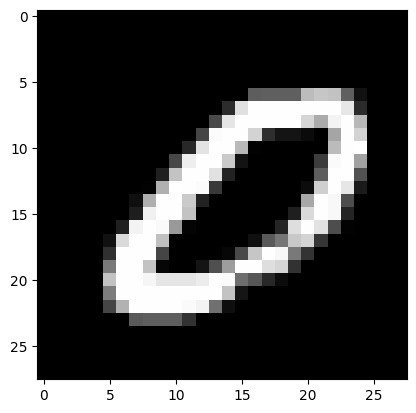

In [ ]:
test_prediction(98, X_dev, Y_dev, W1, b1, W2, b2)